In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
import math
import copy

import scipy
import scipy.io as sio


from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

In [2]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

In [3]:
from matplotlib.pyplot import cm
colors=cm.rainbow(np.linspace(0,1,10))

# 1 Load data

In [4]:
df=pd.read_csv('../data/TECAN_230119.csv',delimiter=',',index_col=0) 
df0=pd.read_csv('../data/TECAN_230119.csv',delimiter=',',index_col=0) 
#time = df.to_numpy()[0]/60
for j in range(38, len(df.iloc[0].to_numpy())+1):
    a = df0.loc["Time [s]",str(j)] - 5*60; 
    df.loc["Time [s]",str(j)] =  a; 
ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean0 = (ydata2+ydata4)/2; 

In [5]:
from matplotlib.pyplot import cm
#colors=cm.rainbow(np.linspace(0,1,10))
colors=cm.gist_rainbow(np.linspace(0,1,10))
colors

array([[1.        , 0.        , 0.16      , 1.        ],
       [1.        , 0.43137255, 0.        , 1.        ],
       [0.97509274, 1.        , 0.        , 1.        ],
       [0.36036036, 1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.23192073, 1.        ],
       [0.        , 1.        , 0.84334809, 1.        ],
       [0.        , 0.5615942 , 1.        , 1.        ],
       [0.05647911, 0.        , 1.        , 1.        ],
       [0.65323956, 0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.75      , 1.        ]])

In [6]:
dict_no_dilu = {'0-':['F3','F4'],
                '1h':['A1','A2'],
          '2h':['A3','A4'],
          '3h':['A5','A6'],
          '4h':['A7','A8'],
          '5h':['B1','B2'],
          '6h':['B3','B4'],
          '7h':['B5','B6'],
          '8h':['B7','B8'],
          'D2':['C1','C2'],
          '0-':['F3','F4']}
dict_1e1_dilu = {'0-':['F3','F4'],
                 '1h':['D1','D2'],
          '2h':['D3','D4'],
          '3h':['D5','D6'],
          '4h':['D7','D8'],
          '5h':['E1','E2'],
          '6h':['E3','E4'],
          '7h':['E5','E6'],
          '8h':['E7','E8'],
          'D2':['F1','F2']}

labels = list(dict_no_dilu.keys())

In [9]:
df_1e0 = pd.read_csv('../data/data_230119_all_csv/df_1e0.csv', sep=',',index_col=False); 
df_1e1 = pd.read_csv('../data/data_230119_all_csv/df_1e1.csv', sep=',',index_col=False); 

df_1e2 = pd.read_csv('../data/data_230119_all_csv/df_1e2.csv', sep=',',index_col=False); 
df_1e3 = pd.read_csv('../data/data_230119_all_csv/df_1e3.csv', sep=',',index_col=False); 

df_1e4 = pd.read_csv('../data/data_230119_all_csv/df_1e4.csv', sep=',',index_col=False); 
df_1e5 = pd.read_csv('../data/data_230119_all_csv/df_1e5.csv', sep=',',index_col=False); 

df_1e6 = pd.read_csv('../data/data_230119_all_csv/df_1e6.csv', sep=',',index_col=False); 
df_1e7 = pd.read_csv('../data/data_230119_all_csv/df_1e7.csv', sep=',',index_col=False); 

df_1e8 = pd.read_csv('../data/data_230119_all_csv/df_1e8.csv', sep=',',index_col=False); 
df_1e9 = pd.read_csv('../data/data_230119_all_csv/df_1e9.csv', sep=',',index_col=False); 

In [10]:
DF_list = [df_1e0, df_1e1, df_1e2, df_1e3, df_1e4, df_1e5, df_1e6, df_1e7, df_1e8, df_1e9];
index_list = ['A1','A3','A5','A7','C1','C3','C5','C7','E1','E3'];
labels = ['1e10','1e9','1e8','1e7','1e6','1e5','1e4','1e3','1e2','1e1']; 

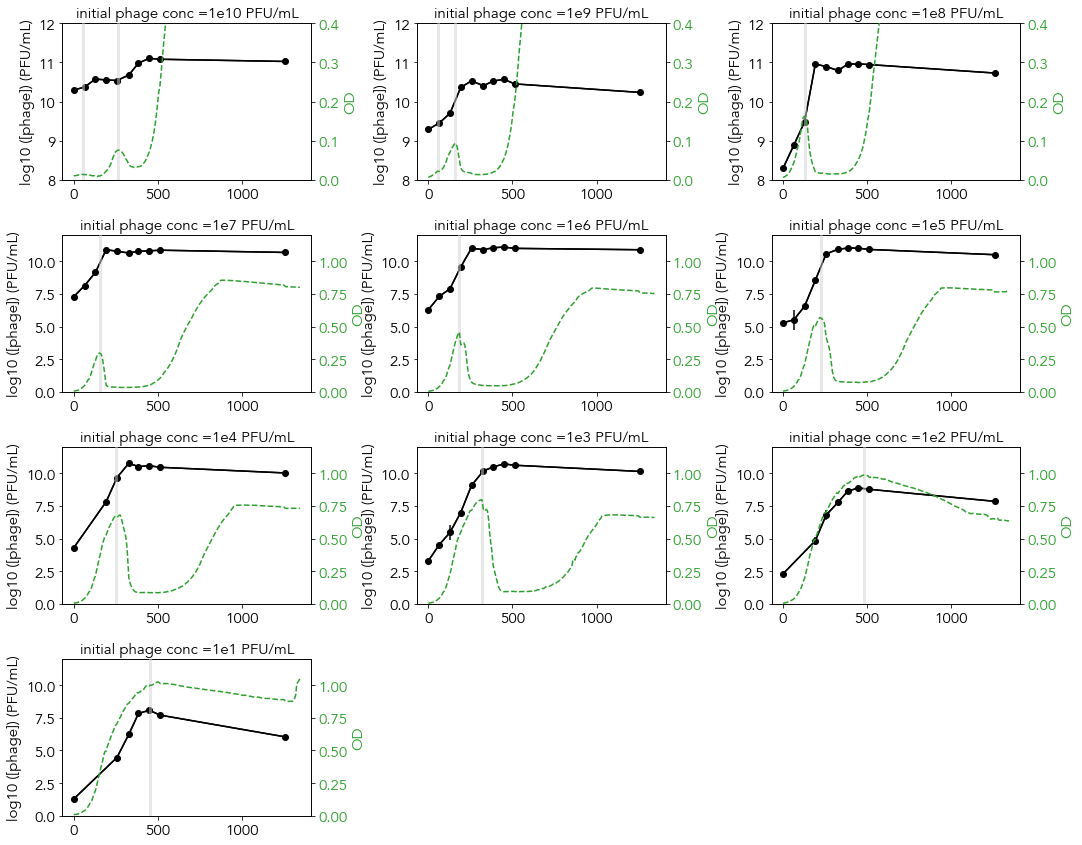

In [11]:
matplotlib.rcParams.update({"figure.figsize": (15,12)})
for k in range(10):
    ax2 = subplot(4,3,k+1)
    t_cell = (df.loc["Time [s]"].to_numpy()[7:] - df.loc["Time [s]"].to_numpy()[7])/60;
    y_cell = df.loc[index_list[k]].to_numpy()[7:] - ymean0[7:];
    
    if k < 1:
        y_tmp = y_cell[t_cell>50]; 
        idx1 = argrelextrema(y_tmp, np.greater_equal)[0][0];
        idx1 = idx1 + len(y_cell) - len(y_tmp);
    if k == 0:
        y_tmp = y_cell[t_cell>250]; 
        idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
    elif k == 5:
        y_tmp = y_cell[t_cell>200]; 
        idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
    elif k > 7:
        y_tmp = y_cell[t_cell>450]; 
        idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
    else:        
        y_tmp = y_cell[t_cell>100]; 
        idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
    idx = idx + len(y_cell) - len(y_tmp);
    
    t_phage = DF_list[k].tdata.to_numpy()
    y_phage = DF_list[k].ydata.to_numpy()
    y_phage_err = DF_list[k].yerr.to_numpy() 
    
    ax2.plot(t_phage,y_phage, 'o-',linewidth=1.5, color='k',zorder=15)
    ax2.errorbar(t_phage, y_phage, yerr=y_phage_err, linewidth=1.5, color='k',zorder=15)
    ax2.set_ylabel('log10 ([phage]) (PFU/mL)')
    ax2.tick_params(axis='y', labelcolor='k')
    ax2.set_title('initial phage conc ='+labels[k]+' PFU/mL')
    if k in [0,1,2]:
        ax2.set_ylim((8,12))
    else:
        ax2.set_ylim((0,12))
    
    ax1 = ax2.twinx()
    ax1.plot(t_cell, y_cell, '--',alpha=1,linewidth=1.5,  color='tab:green',zorder=25)
    if k > 1:
        ax1.axvline(t_cell[idx], color = 'lightgrey', linewidth=3, alpha=0.5, linestyle = '-',zorder=5)
    else:
        ax1.axvline(t_cell[idx], color = 'lightgrey', linewidth=3, alpha=0.5, linestyle = '-',zorder=5)
        ax1.axvline(t_cell[idx1], color = 'lightgrey', linewidth=3, alpha=0.5, linestyle = '-',zorder=5)
    ax1.tick_params(axis='y', labelcolor='tab:green')
    ax1.set_ylabel('OD',color='tab:green')
    if k in [0,1,2]:
        ax1.set_ylim((0,0.4))
    else:
        ax1.set_ylim((0,1.2))
plt.tight_layout()

293
104


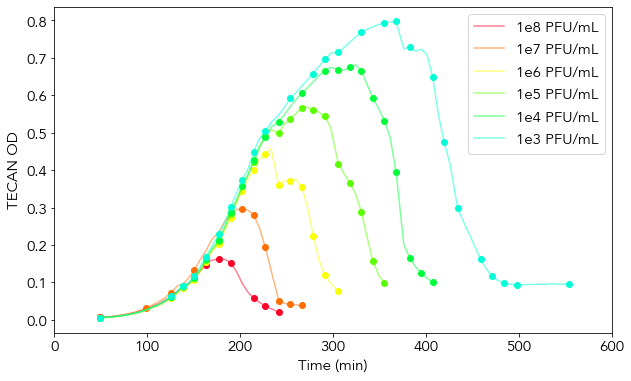

In [12]:
filtering_threshold = 0.35e-4; 
my_dict = {'1e10':['A1','A2','B1','B2'],
          '1e9':['A3','A4','B3','B4'],
          '1e8':['A5','A6','B5','B6'],
          '1e7':['A7','A8','B7','B8'],
          '1e6':['C1','C2','D1','D2'],
          '1e5':['C3','C4','D3','D4'],
          '1e4':['C5','C6','D5','D6'],
          '1e3':['C7','C8','D7','D8'],
          '1e2':['E1','E2','F1','F2'],
          '1e1':['E3','E4','F3','F4']}

idx_dict = {
    10: 12,
    9: 13,
    8: 11,
    7: 11,
    6: 12,
    5: 14,
    4: 18,
    3: 30,
    2: 50,
    1: 22,
}
#'''

time_list = {};
OD_list = {};

all_data = 0;
reducde_data = 0; 
#OD_err = list();
matplotlib.rcParams.update({"figure.figsize": (10,6)})
k = 0; 
i = 8; 
for label_ in labels[2:-2]:
    ncount = 0; 
    vxx = np.array([]); 
    vyy = np.array([]); 
    for j in [my_dict[label_][0]]:
        x_ = df.to_numpy()[0]/60
        y_ = df.loc[j].to_numpy() - ymean0
        
        if i < 10:
            y_tmp = y_[x_>150]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            if i == 5:
                y_tmp = y_[x_>250]; 
                idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            elif i <= 2:
                y_tmp = y_[x_>250]; 
                idx = argmax(y_tmp);
        else:
            y_tmp = y_[x_>80]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        
        idx = idx + len(y_) - len(y_tmp);
        
        if j == -1:
            next;
        else:
            vxx = x_[7:idx+idx_dict[i]];
            vyy = y_[7:idx+idx_dict[i]];
            
            
            all_data += len(vxx);
            
            vyy1 = (vyy[1::2]-vyy[:-1:2])/(vxx[1::2]-vxx[:-1:2])
            vxx1 = vxx[:-1:2];
            
            vyy2 = (vyy1[1:]-vyy1[:-1])/(vxx1[1:]-vxx1[:-1])
            vxx2 = vxx1[:-1];
            
            idx_key = np.where(np.abs(vyy2) > filtering_threshold)[0]*2 + 2;#maybe 3? 
            if i == 10 or i == 9:
                idx_key = np.where(np.abs(vyy2) > filtering_threshold*0.1)[0]*2 + 2;#maybe 3? 
            if 0 not in idx_key:
                idx_key = np.append(idx_key, 0);
                
            if idx+idx_dict[i]-8 not in idx_key:
                idx_key = np.append(idx_key, idx+idx_dict[i]-8);
            
            idx_key = np.sort(idx_key)
            
            reducde_data += len(idx_key);
            
            plt.plot(vxx, vyy, color = colors[k,:], alpha = 0.5, label='1e'+str(i)+' PFU/mL')
            plt.plot(vxx[idx_key], vyy[idx_key], 'o', color = colors[k,:])
            
            time_list[str(i)+'_'+str(ncount)] = vxx[idx_key];
            OD_list[str(i)+'_'+str(ncount)] = vyy[idx_key];
        ncount = ncount+1; 

    k = k+1; 
    i = i-1;
#plt.title('reporter cell: 0.66e7 CFU/mL')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
plt.xlim((0,600))
#plt.grid(True)
plt.legend(ncol=1)
print(all_data)
print(reducde_data)

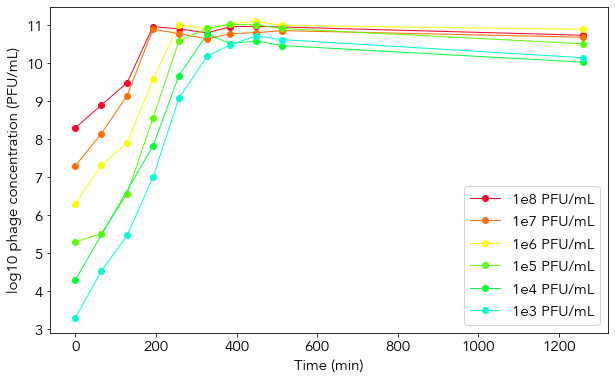

In [13]:
matplotlib.rcParams.update({"figure.figsize": (10,6)})

plt.subplot(1,1,1)
k = 0; 
xdata_ = np.array([]);
ydata_1 = np.array([]);
yerr_1 = np.array([]);
ydata_2 = np.array([]);
yerr_2 = np.array([]);
for k in np.arange(2,8,1):
    plt.plot(DF_list[k].tdata.to_numpy(),DF_list[k].ydata.to_numpy(),'o-', linewidth=1, color=colors[k-2,:], \
             label='1e'+str(10-k)+' PFU/mL')
#plt.errorbar(xdata_, ydata_2, yerr=yerr_2,color='grey')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Time (min)')
plt.ylabel('log10 phage concentration (PFU/mL)')
plt.legend(ncol=1)

In [14]:
phage_conc_arr = np.array([]); 
for i in list(time_list.keys()):
    phage_i = int(i.split('_')[0]);
    phage_conc_arr = np.append(phage_conc_arr, phage_i)
phage_conc_arr = phage_conc_arr.astype(int)
print(list(time_list.keys()))
print(phage_conc_arr)

time_list_keys = list(time_list.keys()); 
print(time_list_keys)

['8_0', '7_0', '6_0', '5_0', '4_0', '3_0']
[8 7 6 5 4 3]
['8_0', '7_0', '6_0', '5_0', '4_0', '3_0']


In [15]:
for i in time_list_keys:
    time_list[i] = time_list[i] - time_list[i][0];
print(time_list)

{'8_0': array([  0.        ,  76.935     ,  89.32      , 101.705     ,
       114.09      , 128.56      , 140.945     , 165.71666667,
       178.10166667, 192.57333333]), '7_0': array([  0.        ,  49.54166667,  76.935     , 101.705     ,
       140.945     , 153.33      , 165.71666667, 178.10166667,
       192.57333333, 204.95833333, 217.34333333]), '6_0': array([  0.        ,  76.935     ,  89.32      , 101.705     ,
       114.09      , 128.56      , 140.945     , 153.33      ,
       165.71666667, 178.10166667, 192.57333333, 204.95833333,
       217.34333333, 229.72833333, 242.115     , 256.72166667]), '5_0': array([  0.        ,  76.935     ,  89.32      , 101.705     ,
       114.09      , 128.56      , 140.945     , 165.71666667,
       178.10166667, 192.57333333, 204.95833333, 217.34333333,
       229.72833333, 242.115     , 256.72166667, 269.10666667,
       281.49166667, 293.87666667, 306.26166667]), '4_0': array([  0.        ,  76.935     ,  89.32      , 101.705     ,
    

In [16]:
celltime_list = time_list;
cellOD_list = OD_list;

j = 2; 
phagetime_list = {};
phageOD_list = {};
for i in time_list_keys:
    phagetime_list[i] = DF_list[j].tdata.to_numpy();
    phageOD_list[i] = np.power(10,DF_list[j].ydata.to_numpy())/1e9;
    j = j+1;
#print(phageOD_list)

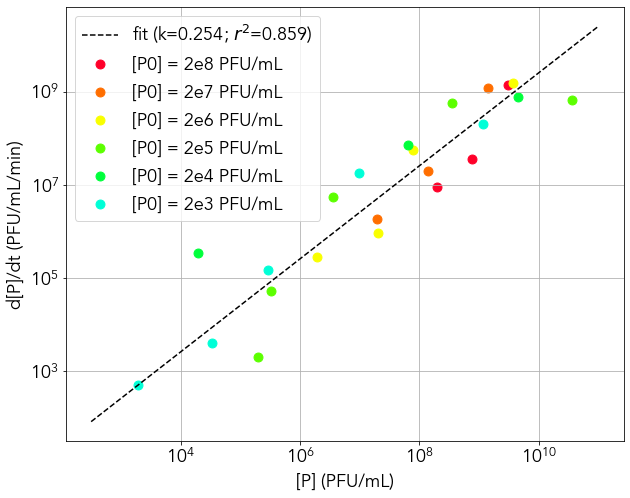

In [17]:
# Define some plotting styles that we will use.
fontSize=18
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

matplotlib.rcParams.update({"figure.figsize": (10,8)})

def linear_no_b(x,k):
    return x + k

xfit = np.array([]);
yfit = np.array([]); 

k = 0; 

for i in list(phagetime_list.keys()):
    px = phagetime_list[i][:-4]
    py = phageOD_list[i][:-4]*1e9; 
    
    dpydt = (py[1:]-py[:-1])/(px[1:]-px[:-1]);
    
    xfit = np.append(xfit, py[:-1]);
    yfit = np.append(yfit, dpydt); 
    
    plt.scatter(py[:-1], dpydt, color=colors[k],s=80, label='[P0] = 2e'+i.split('_')[0]+ ' PFU/mL')
    k = k+1; 
    
# for fitting, remove all valuse below 0
idy = np.where(yfit>0)[0];
xfit = np.log(xfit[idy]);
yfit = np.log(yfit[idy]);

# fitting is performed in log space 
popt, pcov = curve_fit(linear_no_b, xfit,yfit)
ypred = linear_no_b(xfit,*popt); 
SSRes = np.sum((ypred-yfit)**2)
SSTot = np.sum((yfit-np.mean(yfit))**2)
Rsquared = 1 - SSRes/SSTot; 

xdata_ = np.logspace(2.5,11,90)
plt.plot(xdata_, np.exp(linear_no_b(np.log(xdata_), *popt)), '--', color='k',\
        label='fit (k='+str(round(np.exp(popt[0]),3))+'; $r^2$='+str(round(Rsquared,3))+')')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('d[P]/dt (PFU/mL/min)')
plt.xlabel('[P] (PFU/mL)')
plt.legend()
plt.grid(True)

# 1 OD to CFU/mL conversion

In [18]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

/Users/turtle/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


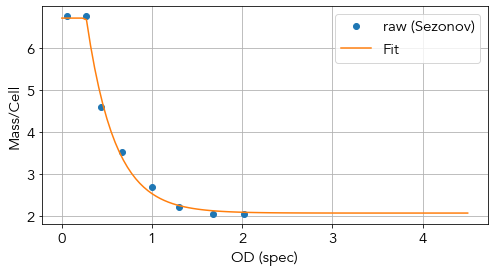

In [19]:
tmp = np.genfromtxt("../data/Default Dataset.csv", delimiter=",")
xtmp = tmp[:,0]
ytmp = tmp[:,1]

def func_conversion(x,a,b,c,d):
    if x < 0.27:
        return np.exp(-b*0.27)*c+d
    else:
        return np.exp(-b*x)*c+d

func_conversion = np.vectorize(func_conversion)
popt_conv,pcov_conv = curve_fit(func_conversion, xtmp, ytmp, p0=[0.6, 1,1, 2])


matplotlib.rcParams.update({"figure.figsize": (8,4)})
plt.plot(xtmp, ytmp, 'o',label='raw (Sezonov)')
plt.plot(np.linspace(0,4.5,100),func_conversion(np.linspace(0,4.5,100),*popt_conv),'-',label='Fit')
plt.xlabel('OD (spec)')
plt.ylabel('Mass/Cell')
plt.grid(True)
plt.legend()

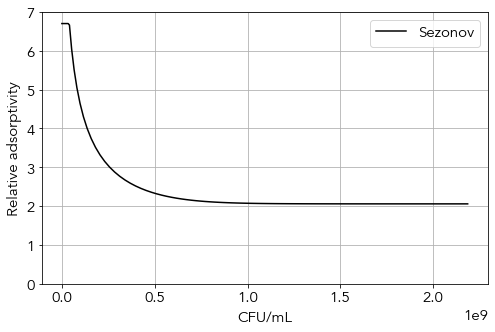

In [20]:
matplotlib.rcParams.update({"figure.figsize": (8,5)})

spec_OD = np.linspace(0,4.5,100);  #mass per mL
mass_per_cell = func_conversion(spec_OD,*popt_conv); 
CFU_per_mL = spec_OD/mass_per_cell*1e9;
#CFU_per_mL = spec_OD/mass_per_cell*2e9;

plt.plot(CFU_per_mL, mass_per_cell, color='k',label='Sezonov')

#plt.plot(TECAN_OD, TECAN_OD*2.2*1e9, color='tab:red',label='Linear',alpha=0.5)
plt.grid(True)
plt.ylabel('Relative adsorptivity')
plt.xlabel('CFU/mL')
plt.ylim((0,7))
#plt.xlim((0,1e9))
plt.legend()

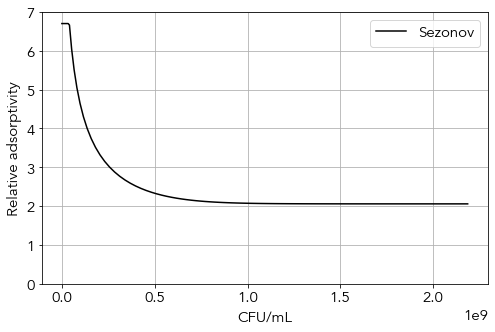

In [21]:
matplotlib.rcParams.update({"figure.figsize": (8,5)})

spec_OD = np.linspace(0,4.5,100);  #mass per mL
mass_per_cell = func_conversion(spec_OD,*popt_conv); 
CFU_per_mL = spec_OD/mass_per_cell*1e9;
#CFU_per_mL = spec_OD/mass_per_cell*2e9;


TECAN_OD = spec_OD/4.5; 
plt.plot(CFU_per_mL, mass_per_cell, color='k',label='Sezonov')
#plt.plot(CFU_per_mL, TECAN_OD, color='k',label='Sezonov')
#plt.plot(TECAN_OD, TECAN_OD*2.2*1e9, color='tab:red',label='Linear',alpha=0.5)
plt.grid(True)
plt.ylabel('Relative adsorptivity')
plt.xlabel('CFU/mL')
plt.ylim((0,7))
#plt.xlim((0,1e9))
plt.legend()

In [22]:
def uninfected_OD_to_CFU(TECAN_OD):
    spec_OD = TECAN_OD*4.5; 
    CFU_per_mL = spec_OD/func_conversion(spec_OD,*popt_conv)*1e9; 
    return CFU_per_mL

No handles with labels found to put in legend.


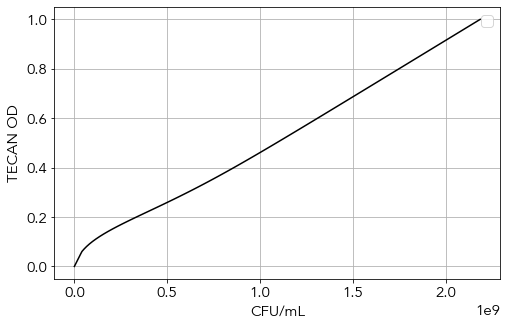

In [23]:
matplotlib.rcParams.update({"figure.figsize": (8,5)})

spec_OD = np.linspace(0,4.5,100);  #mass per mL
mass_per_cell = func_conversion(spec_OD,*popt_conv); 
CFU_per_mL = spec_OD/mass_per_cell*1e9;

TECAN_OD1 = spec_OD/4.5; 
#TECAN_OD2 = CFU_per_mL*mass_per_cell/1e9/4.5; 


##########################################

plt.plot(CFU_per_mL, TECAN_OD1,color='k')
#plt.plot(TECAN_OD, TECAN_OD*conversion_*1e9, color='tab:green',label='try')
#plt.plot(TECAN_OD2, CFU_per_mL, color='tab:red',label='2',alpha=0.5)
plt.grid(True)
plt.xlabel('CFU/mL')
plt.ylabel('TECAN OD')
plt.legend()

293
104


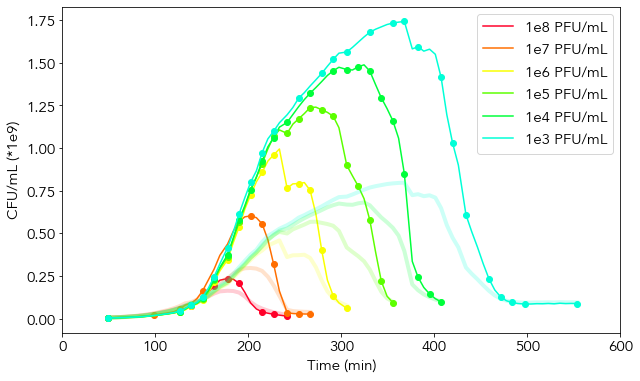

In [24]:
filtering_threshold = 0.35e-4; 
my_dict = {'1e10':['A1','A2','B1','B2'],
          '1e9':['A3','A4','B3','B4'],
          '1e8':['A5','A6','B5','B6'],
          '1e7':['A7','A8','B7','B8'],
          '1e6':['C1','C2','D1','D2'],
          '1e5':['C3','C4','D3','D4'],
          '1e4':['C5','C6','D5','D6'],
          '1e3':['C7','C8','D7','D8'],
          '1e2':['E1','E2','F1','F2'],
          '1e1':['E3','E4','F3','F4']}

idx_dict = {
    10: 12,
    9: 13,
    8: 11,
    7: 11,
    6: 12,
    5: 14,
    4: 18,
    3: 30,
    2: 50,
    1: 22,
}
#'''

#time_list = {};
#OD_list = {};

all_data = 0;
reducde_data = 0; 
#OD_err = list();
matplotlib.rcParams.update({"figure.figsize": (10,6)})
k = 0; 
i = 8; 
for label_ in labels[2:-2]:
    ncount = 0; 
    vxx = np.array([]); 
    vyy = np.array([]); 
    for j in [my_dict[label_][0]]:
        x_ = df.to_numpy()[0]/60
        y_ = df.loc[j].to_numpy() - ymean0
        
        if i < 10:
            y_tmp = y_[x_>150]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            if i == 5:
                y_tmp = y_[x_>250]; 
                idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            elif i <= 2:
                y_tmp = y_[x_>250]; 
                idx = argmax(y_tmp);
        else:
            y_tmp = y_[x_>80]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        
        idx = idx + len(y_) - len(y_tmp);
        
        if j == -1:
            next;
        else:
            vxx = x_[7:idx+idx_dict[i]];
            vyy = y_[7:idx+idx_dict[i]];
            
            
            all_data += len(vxx);
            
            vyy1 = (vyy[1::2]-vyy[:-1:2])/(vxx[1::2]-vxx[:-1:2])
            vxx1 = vxx[:-1:2];
            
            vyy2 = (vyy1[1:]-vyy1[:-1])/(vxx1[1:]-vxx1[:-1])
            vxx2 = vxx1[:-1];
            
            idx_key = np.where(np.abs(vyy2) > filtering_threshold)[0]*2 + 2;#maybe 3? 
            if i == 10 or i == 9:
                idx_key = np.where(np.abs(vyy2) > filtering_threshold*0.1)[0]*2 + 2;#maybe 3? 
            if 0 not in idx_key:
                idx_key = np.append(idx_key, 0);
                
            if idx+idx_dict[i]-8 not in idx_key:
                idx_key = np.append(idx_key, idx+idx_dict[i]-8);
            
            idx_key = np.sort(idx_key)
            
            reducde_data += len(idx_key);
            
            #CFU_per_mL = uninfected_OD_to_CFU(vyy); 
            
            plt.plot(vxx, uninfected_OD_to_CFU(vyy)/1e9, color = colors[k,:], alpha = 1, label='1e'+str(i)+' PFU/mL'); 
            #plt.plot(vxx, vyy*1/func(vyy*4.5,*popt)*4.5, color = colors[k,:], alpha = 1, label='1e'+str(i)+' PFU/mL')
            plt.plot(vxx, vyy, color = colors[k,:], alpha = 0.2, lw=4)
            
            plt.plot(vxx[idx_key], uninfected_OD_to_CFU(vyy[idx_key])/1e9, 'o', color = colors[k,:])
            
#            time_list[str(i)+'_'+str(ncount)] = vxx[idx_key];
#            OD_list[str(i)+'_'+str(ncount)] = vyy[idx_key]; 
        ncount = ncount+1; 

    k = k+1; 
    i = i-1;
#plt.title('reporter cell: 0.66e7 CFU/mL')
plt.xlabel('Time (min)')
plt.ylabel('CFU/mL (*1e9)')
#plt.yscale('log')
plt.xlim((0,600))
#plt.grid(True)
plt.legend(ncol=1)
print(all_data)
print(reducde_data)

## Growth rate fitting

In [25]:
ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata2+ydata4)/2; 

[  0   7   8  10  11  12  13  14  15  16  17  20  22  26  27  31  32  33
  35  38  39  42  43  45  46  52  62  72  82  92 102]
[  0   7   8   9  10  11  12  14  15  17  18  20  21  22  24  26  27  32
  35  36  37  40  42  47  48  49  50  52  62  72  82  92 102]
[  0   7   8  10  11  12  13  15  18  19  22  26  28  31  32  34  36  37
  38  39  40  42  52  62  72  82  92 102]
[  0   7   8  10  11  12  13  15  17  19  21  22  24  26  27  29  30  32
  36  37  38  42  43  45  46  50  52  62  72  82  92 102]
124
412


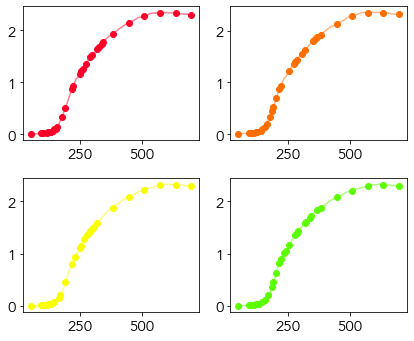

In [26]:
time_list2 = {};
OD_list2 = {};

k = 0; 
all_data = 0;
reducde_data = 0; 

filtering_threshold = 0.35e-4; 
matplotlib.rcParams.update({"figure.figsize": (6,5)})
for j in ['E5','E6','F5','F6']:
    ncount = 0; 
    vxx = df.iloc[0].to_numpy()[7:110]/60
    vyy = df.loc[j].to_numpy()[7:110] - ymean[7:110]
    all_data = all_data+len(vxx)
    
    
    vyy1 = (vyy[1::2]-vyy[:-1:2])/(vxx[1::2]-vxx[:-1:2])
    vxx1 = vxx[:-1:2];
    
    vyy2 = (vyy1[1:]-vyy1[:-1])/(vxx1[1:]-vxx1[:-1])
    vxx2 = vxx1[:-1];
    idx_key = np.where(np.abs(vyy2) > filtering_threshold)[0] + 2;#maybe 3? 
    if 0 not in idx_key:
        idx_key = np.append(idx_key, 0);
    
    for m in np.arange(1,101,10):
        if len(vxx)-m not in idx_key:
            idx_key = np.append(idx_key, len(vxx)-m);
    
    idx_key = np.sort(idx_key)
    print(idx_key)
    reducde_data = reducde_data+len(idx_key)
    
    time_list2[j] = vxx[idx_key];
    OD_list2[j] = uninfected_OD_to_CFU(vyy[idx_key])/1e9; 
    
    
    plt.subplot(2,2,k+1)
    plt.plot(vxx, uninfected_OD_to_CFU(vyy)/1e9, color = colors[k,:], alpha = 0.5, label=j)
    plt.plot(time_list2[j], OD_list2[j], 'o', color = colors[k,:])
    k = k+1;
plt.tight_layout()
print(reducde_data)
print(all_data)

In [27]:
h = 100;

def k_sigmoidal(F, thr1b,thr2b,k1b,k2b,k3b,h):
    return k3b + (k2b-k3b)*1/(1+np.exp(-h*(F-thr2b))) + (k1b-k2b)*1/(1+np.exp(-h*(F-thr1b)))

def f0(x, t, ps):
    try:
        k1 = ps['k1'].value
        k2 = ps['k2'].value
        k3 = ps['k3'].value
        v1 = ps['v1'].value
        v2 = ps['v2'].value
        v3 = ps['v3'].value
        e = ps['e'].value
        thr1 = ps['thr1'].value
        thr2 = ps['thr2'].value
    except:
        k1, k2, k3, v1, v2, v3, e, thr1, thr2 = ps
        
    R, N  = x; 
    
    thr_min = min(thr1, thr2)
    thr_max = max(thr1, thr2)
    
    
    v_ = k_sigmoidal(R, thr_max,thr_min,v1,v2,v3,h);
    k_ = k_sigmoidal(R, thr_max,thr_min,k1,k2,k3,h);
 
    phi = R/(k_+R);
    dR = -e*phi*v_*N
    dN = v_*phi*N
    
    return [dR, dN]

def g0(t, x0, ps):
    x = odeint(f0, x0, t, args=(ps,))
    return x[:,1]

def residual0(ps, ts):
    res_reweight = np.array([]); 
    
    for j in ['E5','E6','F5','F6']:
        time_raw = time_list2[j];
        data_real = OD_list2[j]; 
        
        data_simul = np.zeros(len(time_raw));
        
        x0 = [1, data_real[0]];
        OD_tmp = g0(ts, x0, ps);
        
        z = 0; 
        for j in time_raw:
            t_i = np.where(ts>j-time_raw[0])[0][0];
            data_simul[z] = OD_tmp[t_i];
            z = z+1;
        res_reweight = np.append(res_reweight, data_simul - data_real)
    tmp = 0; 
    if abs(ps['thr1'].value-ps['thr2'].value) < 0.1 or max(ps['thr1'].value,ps['thr2'].value) > 0.9:
        tmp = 1000;
        
    return res_reweight + tmp

In [28]:
'''
import time
t_0 = time.time()
# do stuff

t = linspace(0,750,750);  

params = Parameters()
params.add('k1', value=0.2, min=0.1, max=1)
params.add('k2', value=0.2, min=0.1, max=1)
params.add('k3', value=0.2, min=0.1, max=1)
params.add('v1', value=np.log(2)/20, min=np.log(2)/30, max=1/2)
params.add('v2', value=np.log(2)/20, min=np.log(2)/100, max=1/2)
params.add('v3', value=np.log(2)/20, min=np.log(2)/200, max=np.log(2)/30)
params.add('e', value=1, min=0.01, max=5)
params.add('thr1', value=0.7, min=0.01, max=1)
params.add('thr2', value=0.3, min=0.01, max=1)

result = minimize(residual0, params, args=(t,), method='dual_annealing',nan_policy='omit')

elapsed = time.time() - t_0
print(elapsed)
result.params
'''

"\nimport time\nt_0 = time.time()\n# do stuff\n\nt = linspace(0,750,750);  \n\nparams = Parameters()\nparams.add('k1', value=0.2, min=0.1, max=1)\nparams.add('k2', value=0.2, min=0.1, max=1)\nparams.add('k3', value=0.2, min=0.1, max=1)\nparams.add('v1', value=np.log(2)/20, min=np.log(2)/30, max=1/2)\nparams.add('v2', value=np.log(2)/20, min=np.log(2)/100, max=1/2)\nparams.add('v3', value=np.log(2)/20, min=np.log(2)/200, max=np.log(2)/30)\nparams.add('e', value=1, min=0.01, max=5)\nparams.add('thr1', value=0.7, min=0.01, max=1)\nparams.add('thr2', value=0.3, min=0.01, max=1)\n\nresult = minimize(residual0, params, args=(t,), method='dual_annealing',nan_policy='omit')\n\nelapsed = time.time() - t_0\nprint(elapsed)\nresult.params\n"

In [29]:
k1b = 0.94142243;
k2b = 0.91701951;
k3b = 0.84008990;
v1b = 0.06815681;
v2b = 0.02059688;
v3b = 0.01212753;
eb = 0.42767688;
thr1b = 0.65605135;
thr2b = 0.41061183;

'''
k1b = result.params['k1'].value
k2b = result.params['k2'].value
k3b = result.params['k3'].value
v1b = result.params['v1'].value
v2b = result.params['v2'].value
v3b = result.params['v3'].value
eb = result.params['e'].value
if result.params['thr2'].value > result.params['thr1'].value:
    thr1b = result.params['thr2'].value
    thr2b = result.params['thr1'].value
else:
    thr1b = result.params['thr1'].value
    thr2b = result.params['thr2'].value
'''

"\nk1b = result.params['k1'].value\nk2b = result.params['k2'].value\nk3b = result.params['k3'].value\nv1b = result.params['v1'].value\nv2b = result.params['v2'].value\nv3b = result.params['v3'].value\neb = result.params['e'].value\nif result.params['thr2'].value > result.params['thr1'].value:\n    thr1b = result.params['thr2'].value\n    thr2b = result.params['thr1'].value\nelse:\n    thr1b = result.params['thr1'].value\n    thr2b = result.params['thr2'].value\n"

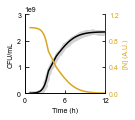

In [30]:
t_offset = df.iloc[0].to_numpy()[7]/60; 
ylim_max = 1.5; 
data_color = 'lightgray' #'#b2e2e2'
model_cell_color = 'k' #[44/255,162/255,95/255,1]#'lightgreen'

psb = [k1b, k2b, k3b, v1b, v2b, v3b, eb, thr1b, thr2b];
tsb = linspace(0,765,765); 

myt = df.iloc[0].to_numpy()[7:110]/60; 


x0_ = np.array([]); 
for j in ['E5','E6','F5','F6']:
    dd = df.loc[j].to_numpy()[7] - ymean[7];
    dd1 = uninfected_OD_to_CFU(dd)/1e9; 
    x0_ = np.append(x0_, dd1);
    
x0 = [1, np.mean(x0_)];
x = odeint(f0, x0, tsb, args=(psb,))
myF = x[:,0]; 
idt1 = np.where(myF<thr1b)[0][0];
idt2 = np.where(myF<thr2b)[0][0];

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.45,1.45)})
ax = plt.subplot(1,1,1)

'''
plt.fill_between(tsb[:idt1]+t_offset, ylim_max,color='darkgrey',alpha=0.5,edgecolor=None)
plt.fill_between(tsb[idt1-1:idt2]+t_offset, ylim_max,color='lightgrey',alpha=0.5,edgecolor=None)
plt.fill_between(tsb[idt2-1:]+t_offset, ylim_max,  color='white',alpha=0.5, edgecolor=None)
'''

for j in ['E5','E6','F5','F6']:
    ydata = df.loc[j].to_numpy()[7:110] - ymean[7:110]; 
    dd1 = uninfected_OD_to_CFU(ydata)/1e9; 

    if j == 'E5':
        plt.plot(myt/60, dd1*1e9,'o',markersize=3, color=data_color,label='Data')
    else:
        plt.plot(myt/60, dd1*1e9,'o',markersize=3, color=data_color)

plt.plot((tsb+t_offset)/60, x[:,1]*1e9,linewidth=1.5,  color=model_cell_color, label='Model')
ax.set_ylabel('CFU/mL', color=model_cell_color) 
ax.tick_params(axis='y', labelcolor=model_cell_color)
ax.set_xlabel('Time (h)')
plt.xticks([0,6,12],[0,6,12])
#ax.set_ylabel('$OD_{600}$')
ax.set_ylim((0,3e9)) #ax.set_ylim((0,ylim_max))
ax.set_xlim((0,12))
ax.set_yticks([0,1e9,2e9,3e9])

ax2 = ax.twinx()
ax2.plot((tsb+t_offset)/60, x[:,0],linewidth=1.5,  color='goldenrod', label='Model (nutrient)')
ax2.set_ylabel('[N] (A.U.)', color='goldenrod') 
ax2.tick_params(axis='y', labelcolor='goldenrod')
ax2.set_ylim((0,1.2))#ax2.set_ylim((0,ylim_max))
ax2.set_yticks([0,0.4,0.8,1.2])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis="y",direction="in")
ax2.tick_params(axis="x",direction="in")

#ax.legend(frameon=False,loc='upper left',ncol=1)
#plt.savefig('../fB2out_0119.pdf', format='pdf', bbox_inches='tight')

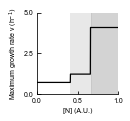

In [31]:
def k_raw(F, thr1b,thr2b,k1b,k2b,k3b):
    if F > thr1b:
        return k1b
    elif F <= thr1b and F > thr2b:
        return k2b
    else:
        return k3b
k_raw = np.vectorize(k_raw)

##############################

#thr1b = 1;
#thr2b = thrb; 

v1b__ = v1b;
v2b__ = v2b;
v3b__ = v3b;

k1b__ = k1b;
k2b__ = k2b;
k3b__ = k3b;

##############################

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.85,1.65)})
ax1 = plt.subplot(1,1,1)



#plt.title('LBM')
#plt.plot(myt, data,'o',markersize=7.5, color='grey',label='Data')
myF = x[:,0]; 
idt1 = np.where(myF<thr1b)[0][0];
#idt2 = np.where(myF<thr2b)[0][0];

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis="y",direction="in")
ax1.tick_params(axis="x",direction="in")

ax1.fill_between(np.arange(0,thr2b+0.01,0.01),5, color='white',alpha=0.5, edgecolor=None)
ax1.fill_between(np.arange(thr2b, thr1b+0.02,0.01),5, color='lightgrey',alpha=0.5, edgecolor=None)
ax1.fill_between(np.arange(thr1b+0.01,1.01,0.01),5, color='darkgrey',alpha=0.5, edgecolor=None)

F = np.linspace(0,1,1000)
color1 = 'k'; 
color2 = 'goldenrod'; 

ax1.plot(F, k_raw(F, thr1b,thr2b,v1b__,v2b__,v3b__)*60,linewidth=1.25,color=color1)
ax1.set_xlabel('[N] (A.U.)')
#ax1.set_ylabel('$v$ (/min)', color=color1)
ax1.set_ylabel('Maximum growth rate v (h$^{-1}$)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim((0,5))
ax1.set_xlim((0,1))
ax1.set_yticks([0,2.5,5])

'''
ax2 = ax1.twinx()
ax2.plot(F, k_raw(F, thr1b,thr2b,k1b__,k2b__,k3b__),linewidth=1.25,color=color2)
#plt.plot(F, k_sigmoidal(F, thr1b,thr2b,v1b,v2b,v3b,h),label='approximation (sigmoid)')
ax2.set_xlabel('Relative food abundance')
ax2.set_ylabel('Monod constant K (A.U.)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.set_ylim((0,1.5))

ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax2.tick_params(axis="y",direction="in")
ax2.tick_params(axis="x",direction="in")
'''
plt.tight_layout()
#plt.savefig('../fB2in_0119.pdf', format='pdf', bbox_inches='tight')

In [32]:
from numpy.polynomial import Polynomial


#CFU_per_mL = x[:,1];
myt = (df.iloc[0].to_numpy()[7:110] - df.iloc[0].to_numpy()[7])/60; #minute, 0 
OD_TECAN = df.loc['E5'].to_numpy()[7:110] - ymean[7:110]; #start from non zero


OD_spec = OD_TECAN*4.5;
CFU_per_mL = uninfected_OD_to_CFU(OD_TECAN)/1e9; 
adsorptivity = OD_spec/CFU_per_mL; 

N_arr = np.array([]);
for i in myt:
    N_arr = np.append(N_arr, x[round(i),0])


max_ab = max(adsorptivity);
min_ab = min(adsorptivity);
N0_ab = N_arr[12];
print(N0_ab)

def poly5(x, c1,c2,c3,c4):
    if x > N0_ab:
        x_p = N0_ab-0.4; 
    else:
        x_p = x - 0.4;
    return np.exp(c1 + c2*x_p + c3*x_p**2 + c4*x_p**3) + min_ab
    
poly5 = np.vectorize(poly5)

0.9785183250700821


In [33]:
print(min_ab)

2.0585875641191977


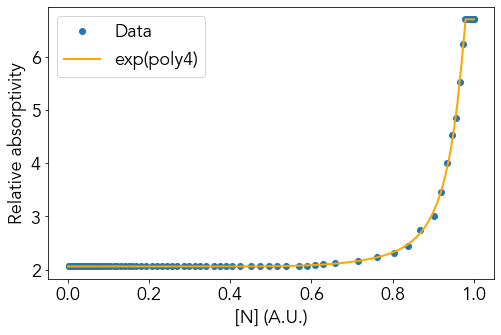

In [34]:
fontSize=18
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

matplotlib.rcParams.update({"figure.figsize": (8,5)})

#popt1, pcov1 = curve_fit(poly5, N_arr, adsorptivity,p0=[-7.85811816,30.6671105,-61.5592316,63.20513919])
#print(popt1)
popt1 = [-8.71193124, 37.15096412, -76.22902199, 73.68755247]
plt.plot(N_arr, adsorptivity ,'o',label='Data')
#plt.axvline(x=N_arr[12])
n_test = np.linspace(0,1,100)
plt.plot(n_test, poly5(n_test,*popt1),color='orange',lw=2, label='exp(poly4)')
plt.xlabel('[N] (A.U.)')
plt.ylabel('Relative absorptivity')
plt.legend()
#plt.yscale('log')
#plt.ylim((0,7))

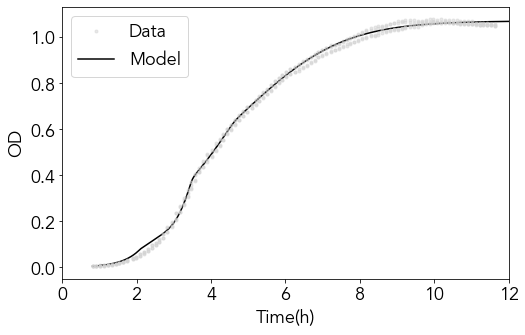

In [35]:
fontSize=18
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

matplotlib.rcParams.update({"figure.figsize": (8,5)})

t_offset = df.iloc[0].to_numpy()[7]/60; 
ylim_max = 1.5; 
data_color = 'lightgray' #'#b2e2e2'
model_cell_color = 'k' #[44/255,162/255,95/255,1]#'lightgreen'

psb = [k1b, k2b, k3b, v1b, v2b, v3b, eb, thr1b, thr2b];
tsb = linspace(0,765,765); 

myt = df.iloc[0].to_numpy()[7:110]/60; 


x0_ = np.array([]); 
for j in ['E5','E6','F5','F6']:
    dd = df.loc[j].to_numpy()[7] - ymean[7];
    dd1 = uninfected_OD_to_CFU(dd)/1e9; 
    x0_ = np.append(x0_, dd1);
    
x0 = [1, np.mean(x0_)];
x = odeint(f0, x0, tsb, args=(psb,))

absorptivity = poly5(x[:,0], *popt1);
TECAN_OD = np.multiply(absorptivity, x[:,1])/4.5; 


for j in ['E5','E6','F5','F6']:
    dd1 = df.loc[j].to_numpy()[7:110] - ymean[7:110]; 
    
    if j == 'E5':
        plt.plot(myt/60, dd1,'o',markersize=3, color=data_color,alpha=0.5,label='Data')
        plt.plot((tsb+t_offset)/60, TECAN_OD,'-', markersize=3, color=model_cell_color,label='Model')
#        plt.plot((tsb+t_offset)/60, x[:,0],'-', markersize=3, color='gold',label='Model')
    else:
        plt.plot(myt/60, dd1,'o',markersize=3, color=data_color,alpha=0.5)

plt.xlabel('Time(h)')
plt.ylabel('OD')
plt.xlim((0,12))
plt.legend()

# 2 Fitting

In [36]:
k1b = 0.94142243;
k2b = 0.91701951;
k3b = 0.84008990;
v1b = 0.06815681;
v2b = 0.02059688;
v3b = 0.01212753;
eb = 0.42767688;
thr1b = 0.65605135;
thr2b = 0.41061183;

h = 100;

ymean = ymean0; 


from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import copy

def f0(x, t, ps):
    try:
        r = ps['r'].value
        b = ps['b'].value
        tau = ps['tau'].value
        kk = ps['kk'].value
    except:
        r, b, tau, kk = ps
    
    F, S, I1, I2, I3, I4, I5, P  = x; 
    
    F = max(0,F)
    S = max(0,S)
    I1 = max(0,I1)
    I2 = max(0,I2)
    I3 = max(0,I3)
    I4 = max(0,I4)
    I5 = max(0,I5)
    P = max(0,P)
    
    
    IM = I5; 
    I_all = I1 + I2 + I3 + I4 + I5;
    M = 5; 
    
    thr_min = min(thr1b, thr2b)
    thr_max = max(thr1b, thr2b)
    
    v_ = k_sigmoidal(F, thr_max,thr_min,v1b,v2b,v3b,h);
    k_ = k_sigmoidal(F, thr_max,thr_min,k1b,k2b,k3b,h);
    
    phi = F/(k_+F);
    growth_rate = v_*phi;
    #tau = lysis_k/growth_rate + lysis_b; 
    
    relative_growth = v_*phi/(v1b/(k1b+1)); 
    r_ = max(0,kk+r*relative_growth); 
    
    if S == 0 or P == 0:
        adsorption1 = 0;
    else:
        adsorption1 = np.exp(np.log(S) + np.log(P))*r_
    
    if S + I_all  == 0 or P == 0:
        adsorption2 = 0; 
    else:
        adsorption2 = np.exp(np.log(S+I_all) + np.log(P))*r_
    
    lysis = M/tau*IM; 
    
    dF = -eb*phi*v_*(S+I_all)
    dS = v_*phi*S - adsorption1; 
    dI1 = adsorption1 - M/tau*I1; 
    dI2 = M/tau*(I1-I2);
    dI3 = M/tau*(I2-I3);
    dI4 = M/tau*(I3-I4);
    dI5 = M/tau*(I4-I5);
    dP = b*lysis - adsorption2;

    return [dF,dS,dI1,dI2,dI3,dI4,dI5,dP]

def residual11(ps, ts, time_list, OD_list, phageOD_list):
    res_reweight = np.array([]); 
    data_idx = 0; 
    i = 0; 
    for dataframe_key in time_list_keys: 
    
        # obtain time list and OD list for cell
        time_cell = time_list[dataframe_key];
        OD_cell = OD_list[dataframe_key]; 
        
        # simulate OD
        OD_cell_simul = np.zeros(len(time_cell)); 
        
        #####################################################
        cell_00 = df.loc['E5'].to_numpy()[7] - ymean0[7]; 
        cell_0 = uninfected_OD_to_CFU(cell_00)/1e9; 
        
        #####################################################
        
        phage_0 = phageOD_list[dataframe_key][0]; 
        x0 = [1, cell_0, 0, 0, 0, 0, 0, phage_0];
        x = odeint(f0, x0, ts, args=(ps,))
        
        all_CFU = x[:,1] + (x[:,2]*1 + x[:,3]*1.3 + x[:,4]*1.7 + x[:,5]*2.3 + x[:,6]*3);
        #all_CFU = x[:,1] + x[:,2] + x[:,3] + x[:,4] + x[:,5] + x[:,6]; 
        my_adsorptivity = poly5(x[:,0], *popt1);
        
        all_cells = np.multiply(all_CFU, my_adsorptivity)/4.5; 
        #all_phages = x[:,7] + 0.5*ps['b'].value*(x[:,2] + x[:,3] + x[:,4] + x[:,5]+ x[:,6]); 
        
        z = 0; 
        for j in time_cell:
            t_i = np.where(ts>j)[0][0];
            OD_cell_simul[z] = all_cells[t_i];
            z = z+1;
        
        # update residual
        OD_cell_simul[OD_cell_simul<=0] = 0;
        
        range_cell = np.max(OD_cell)-np.min(OD_cell); 
        res_cell = abs(OD_cell_simul - OD_cell)/len(OD_cell)/range_cell;
        
        res_reweight = np.append(res_reweight, res_cell)
    return np.abs(res_reweight)

In [35]:
N = 1;

r_mal = np.zeros(N); 
b_mal = np.zeros(N); 
tau_mal = np.zeros(N); 
kk_mal = np.zeros(N); 

t_0 = time.time() 
for i_ in range(N):
    
    t = linspace(0,1400,1400);  
    params = Parameters()
    params.add('r', value=0.01, min=0.001, max=0.1)
    params.add('b', value=100, min=10, max=1000)
    params.add('tau', value=50, min=30, max=150)
    params.add('kk', value=0, min=-0.1, max=0.1)

    result = minimize(residual11, params, args=(t, time_list, OD_list, phageOD_list), \
                  method='dual_annealing',nan_policy='omit')

    r_mal[i_] = result.params['r'].value;
    b_mal[i_] = result.params['b'].value;
    tau_mal[i_] = result.params['tau'].value;
    kk_mal[i_] = result.params['kk'].value;
    
elapsed = time.time() - t_0
print(elapsed)

631.4873878955841


In [36]:
result.params

name,value,initial value,min,max,vary
r,0.03010192,0.01,1.0000e-03,0.10000000,True
b,267.854627,100,10.0000000,1000.00000,True
tau,47.7816921,50,30.0000000,150.000000,True
kk,-0.00185648,0,-0.10000000,0.10000000,True


In [37]:
def simul_(ps):
    data_idx = 0; 
    i = 0; 
    all_cell_arr = {};
    all_phage_arr ={}; 
    
    ts = linspace(0,1400,1400);
    for dataframe_key in time_list_keys: 
        # obtain time list and OD list for cell
        time_cell = time_list[dataframe_key];
        OD_cell = OD_list[dataframe_key]; 

        # obtain time list and OD list for phage
        time_phage = phagetime_list[dataframe_key];
        OD_phage = phageOD_list[dataframe_key];

        # simulate OD
        OD_cell_simul = np.zeros(len(time_cell)); 
        OD_phage_simul = np.zeros(len(time_phage)); 

        #####################################################
        cell_00 = df.loc['E5'].to_numpy()[7] - ymean0[7]; 
        cell_0 = uninfected_OD_to_CFU(cell_00)/1e9; 

        #####################################################

        phage_0 = phageOD_list[dataframe_key][0]; 
        x0 = [1, cell_0, 0, 0, 0, 0, 0, phage_0];
        x = odeint(f0, x0, ts, args=(ps,))

        all_CFU = x[:,1] + (x[:,2]*1 + x[:,3]*1.3 + x[:,4]*1.7 + x[:,5]*2.3 + x[:,6]*3);
        #all_CFU = x[:,1] + x[:,2] + x[:,3] + x[:,4] + x[:,5] + x[:,6]; 
        my_adsorptivity = poly5(x[:,0], *popt1);

        all_cell_tmp = np.multiply(all_CFU, my_adsorptivity)/4.5; 
        all_phage_tmp = x[:,7] + ps[1]*x[:,6]; #0.5*ps[1]*(x[:,2] + x[:,3] + x[:,4] + x[:,5]+ x[:,6]); 
        
        max_time_cell = round(max(time_cell))
        max_time_phage = round(max(time_phage))
        
        all_cell_arr[dataframe_key] = all_cell_tmp[:max_time_cell]
        all_phage_arr[dataframe_key] = all_phage_tmp[:max_time_phage]
        
    return (all_cell_arr, all_phage_arr)

In [38]:
p_best = [0.03010192, 267.854627, 47.7816921, -0.00185648]; 
(cell_best, phage_best) = simul_(p_best);

[ 0. 12. 14. 17. 18. 20. 22. 24. 27. 29. 32. 36. 39. 40. 44. 48. 50. 52.
 56. 58. 60. 64. 66. 68. 70. 79.]


<ipython-input-39-3146b5c97dd0>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = subplot(1,2,1)
<ipython-input-39-3146b5c97dd0>:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = subplot(1,2,2)
<ipython-input-39-3146b5c97dd0>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

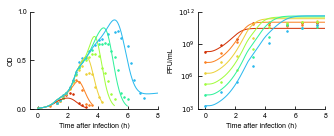

In [39]:
ts = np.linspace(0,1400,1400); 
###########################

from matplotlib.pyplot import cm
colors=cm.turbo.reversed()(np.linspace(0,1,9))

marker_size_ = 1.5; 
line_width_ = 1; 
color_off_set = 1; 

alpha_ = 1; 
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
height = 1.9; 
scale_ratio = 2.45; 

matplotlib.rcParams.update({"figure.figsize": (height*scale_ratio,height)})
###########################

i = 0; 
for dataframe_key in time_list_keys: 
    # obtain time list and OD list for cell
    time_cell = time_list[dataframe_key];
    max_time_cell = round(max(time_cell))
    OD_cell = OD_list[dataframe_key]; 

    # obtain time list and OD list for phage
    time_phage = phagetime_list[dataframe_key];
    max_time_phage = round(max(time_phage))
    OD_phage = phageOD_list[dataframe_key];
    
    if dataframe_key == '3_0':
        time00 = (df.loc["Time [s]"].to_numpy()[7:] - df.loc["Time [s]"].to_numpy()[7])/60;
        idx__ = np.zeros(len(time_list['3_0']));
        jj = 0; 
        for ii in time_list['3_0']:
            idx__[jj] = np.where(time00 >= ii)[0][0];
            jj = jj+1;
        print(idx__)
        idx__ = idx__.astype(int)
        idx__ = idx__.astype(int)
        cc = df.loc['C7'].to_numpy()[7:] - ymean[7:];  #C7,C8,D7,D8
        OD_cell = cc[idx__];
    
    ax = subplot(1,2,1)
    if i == 5:
        plt.plot(ts[:max_time_cell]/60, cell_best[dataframe_key][:max_time_cell], \
                 color=colors[i+color_off_set,:], \
                 linewidth=line_width_,alpha=alpha_,label='Model',zorder=10)
        plt.plot(time_cell[:-3]/60, OD_cell[:-3], 'o', \
                 markersize=marker_size_, \
                 color=colors[i+color_off_set,:],label='Data',zorder=0)
    else:
        plt.plot(ts[:max_time_cell]/60, cell_best[dataframe_key][:max_time_cell],\
                 color=colors[i+color_off_set,:], alpha=alpha_,\
                 linewidth=line_width_,zorder=10)
        plt.plot(time_cell/60, OD_cell, 'o', \
                 markersize=marker_size_, \
                 color=colors[i+color_off_set,:],zorder=0)
    plt.xlabel('Time after infection (h)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    plt.xlim((-0.5,8))
    plt.ylim((0,1))
    plt.ylabel('OD')
    plt.yticks([0,0.5,1],['0.0','0.5','1.0'])

#    '''
    ax = subplot(1,2,2)
#    plt.title('Phage')
    plt.plot(time_phage/60, OD_phage*1e9, 'o', \
             markersize=marker_size_, \
             color=colors[i+color_off_set,:])
    plt.plot(ts[:len(phage_best[dataframe_key])]/60, phage_best[dataframe_key]*1e9,\
             color=colors[i+color_off_set,:],\
             linewidth=line_width_,alpha=alpha_)
    plt.yscale('log')
    plt.ylabel('PFU/mL')
    plt.xlabel('Time after infection (h)')
    plt.ylim((1e3,1e12))
    plt.xlim((-0.5,8))
    plt.yticks([1e3,1e6,1e9,1e12],[r'$10^3$',r'$10^6$',r'$10^9$',r'$10^{12}$'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
#    '''
    i = i+1;
plt.tight_layout()
#plt.savefig('../LB2d/LB_v1r_cell_best_fit.pdf', format='pdf', bbox_inches='tight')

In [40]:
'''
def f1(x, t, ps):
    try:
        r = ps['r'].value
        b = ps['b'].value
    except:
        r, b= ps
    
    F, S, I1, I2, I3, I4, I5, P  = x; 
    
    F = max(0,F)
    S = max(0,S)
    I1 = max(0,I1)
    I2 = max(0,I2)
    I3 = max(0,I3)
    I4 = max(0,I4)
    I5 = max(0,I5)
    P = max(0,P)
    
    
    kk = 0;
    tau = 30;
    
    IM = I5; 
    I_all = I1 + I2 + I3 + I4 + I5;
    M = 5; 
    
    thr_min = min(thr1b, thr2b)
    thr_max = max(thr1b, thr2b)
    
    v_ = k_sigmoidal(F, thr_max,thr_min,v1b,v2b,v3b,h);
    k_ = k_sigmoidal(F, thr_max,thr_min,k1b,k2b,k3b,h);
    
    phi = F/(k_+F);
    growth_rate = v_*phi;
    #tau = lysis_k/growth_rate + lysis_b; 
    
    relative_growth = v_*phi/(v1b/(k1b+1)); 
    r_ = max(0,kk+r*relative_growth); 
    
    if S == 0 or P == 0:
        adsorption1 = 0;
    else:
        adsorption1 = np.exp(np.log(S) + np.log(P))*r_
    
    if S + I_all  == 0 or P == 0:
        adsorption2 = 0; 
    else:
        adsorption2 = np.exp(np.log(S+I_all) + np.log(P))*r_
    
    lysis = M/tau*IM; 
    
    dF = -eb*phi*v_*(S+I_all)
    dS = v_*phi*S - adsorption1; 
    dI1 = adsorption1 - M/tau*I1; 
    dI2 = M/tau*(I1-I2);
    dI3 = M/tau*(I2-I3);
    dI4 = M/tau*(I3-I4);
    dI5 = M/tau*(I4-I5);
    dP = b*lysis - adsorption2;

    return [dF,dS,dI1,dI2,dI3,dI4,dI5,dP]
'''

def residual12(ps):
    res_reweight = np.array([]); 
    data_idx = 0; 
    i = 0; 
    for dataframe_key in time_list_keys: 
    
        # obtain time list and OD list for cell
        time_cell = time_list[dataframe_key];
        OD_cell = OD_list[dataframe_key]; 
        
        # simulate OD
        OD_cell_simul = np.zeros(len(time_cell)); 
        
        #####################################################
        cell_00 = df.loc['E5'].to_numpy()[7] - ymean0[7]; 
        cell_0 = uninfected_OD_to_CFU(cell_00)/1e9; 
        
        #####################################################
        
        phage_0 = phageOD_list[dataframe_key][0]; 
        x0 = [1, cell_0, 0, 0, 0, 0, 0, phage_0];
        x = odeint(f0, x0, ts, args=(ps,))
        
        all_CFU = x[:,1] + (x[:,2]*1 + x[:,3]*1.3 + x[:,4]*1.7 + x[:,5]*2.3 + x[:,6]*3);
        #all_CFU = x[:,1] + x[:,2] + x[:,3] + x[:,4] + x[:,5] + x[:,6]; 
        my_adsorptivity = poly5(x[:,0], *popt1);
        
        all_cells = np.multiply(all_CFU, my_adsorptivity)/4.5; 
        #all_phages = x[:,7] + 0.5*ps['b'].value*(x[:,2] + x[:,3] + x[:,4] + x[:,5]+ x[:,6]); 
        
        z = 0; 
        for j in time_cell:
            t_i = np.where(ts>j)[0][0];
            OD_cell_simul[z] = all_cells[t_i];
            z = z+1;
        
        # update residual
        OD_cell_simul[OD_cell_simul<=0] = 0;
        
        range_cell = np.max(OD_cell)-np.min(OD_cell); 
        res_cell = abs(OD_cell_simul - OD_cell)/len(OD_cell)/range_cell;
        
        res_reweight = np.append(res_reweight, res_cell)
    return np.abs(res_reweight)

In [41]:
import lmfit

#from lmfit import Minimizer, Parameters, create_params, report_fit
ts = linspace(0,1400,1400);
p00 = Parameters()
p00.add('r', value=r_mal[0], min=0.001, max=0.1)
p00.add('b', value=b_mal[0], min=10, max=1000)
p00.add('tau', value=tau_mal[0], min=30, max=150)
p00.add('kk', value=kk_mal[0], min=-0.1, max=0.1)


mini = lmfit.Minimizer(residual12, p00, nan_policy='omit')
out2 = mini.minimize(method='leastsq')

In [42]:
from lmfit import conf_interval, report_ci
#print(out2.fit_report())
lmfit.report_fit(out2.params, min_correl=0.5)
ci, trace = lmfit.conf_interval(mini, out2, sigmas=[1,2], trace=True)
print(lmfit.printfuncs.ci_report(ci))

[[Variables]]
    r:    0.03015094 +/- 0.00354328 (11.75%) (init = 0.03010192)
    b:    269.467392 +/- 21.8381373 (8.10%) (init = 267.8546)
    tau:  47.4532500 +/- 1.57757427 (3.32%) (init = 47.78169)
    kk:  -0.00190106 +/- 2.2197e-04 (11.68%) (init = -0.001856476)
[[Correlations]] (unreported correlations are < 0.500)
    C(r, tau)  = 0.953
    C(r, kk)   = -0.951
    C(tau, kk) = -0.950
    C(r, b)    = -0.845
    C(b, tau)  = -0.698
    C(b, kk)   = 0.664


/Users/turtle/anaconda3/lib/python3.8/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(r=0.026607663025078818) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/turtle/anaconda3/lib/python3.8/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(r=0.03369421826569481) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/turtle/anaconda3/lib/python3.8/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(b=247.62925442040768) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/turtle/anaconda3/lib/python3.8/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(b=291.3055290031851) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/turtle/anaconda3/lib/python3.8/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(tau=45.87567571403267) = 0.0 < max(sigmas)
  warn(errmsg)
/Users/turtle/anaconda3/lib

        95.45%    68.27%    _BEST_    68.27%    95.45%
 r  :      -inf      -inf   0.03015      +inf      +inf
 b  :      -inf      -inf 269.46739      +inf      +inf
 tau:      -inf      -inf  47.45325      +inf      +inf
 kk :  -0.00016  -0.00008  -0.00190      +inf      +inf


/Users/turtle/anaconda3/lib/python3.8/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(kk=-0.0016790890632942571) = 0.0 < max(sigmas)
  warn(errmsg)


# 3 MCMC

In [43]:
import lmfit
import emcee

#from lmfit import Minimizer, Parameters, create_params, report_fit
ts = linspace(0,600,600);
p00 = Parameters()
p00.add('r', value=r_mal[0], min=0.001, max=0.1)
p00.add('b', value=b_mal[0], min=10, max=1000)
p00.add('tau', value=tau_mal[0], min=30, max=150)
p00.add('kk', value=kk_mal[0], min=-0.1, max=0.1)


res = lmfit.minimize(residual12, method='emcee', nan_policy='omit', burn=300, steps=6000, thin=20,
                     params=p00, is_weighted=False, progress=False)


The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 120;
tau: [233.17724793 477.05491698 439.05977164 144.95003732 338.38406006]


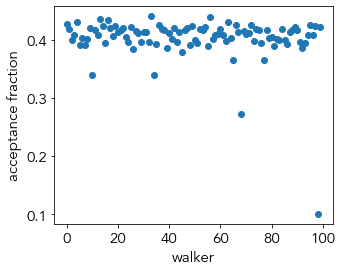

In [44]:
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

matplotlib.rcParams.update({"figure.figsize": (5,4)})
plt.plot(res.acceptance_fraction, 'o')
plt.xlabel('walker')
plt.ylabel('acceptance fraction')
plt.show()

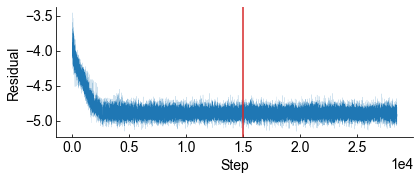

In [45]:
height = 1.9; 
scale_ratio = 2.45; 

fontSize=14
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})


fig, ax = plt.subplots(1, 1, figsize=(3.2*2, 2.4))

plt.plot(range(len(res.flatchain)),res.flatchain.iloc[:,4],lw=0.1)
plt.axvline(x=15000,color='tab:red')
plt.xlabel('Step')
plt.ylabel('Residual')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('../LB2d/LBv0r_chain.pdf', format='pdf', bbox_inches='tight')

In [46]:
df_tmp = res.flatchain.iloc[:,:]
df_tmp.to_csv('../tmp/csv/LB_v1r_cell.csv')

In [42]:
df_tmp = pd.read_csv('../tmp/csv/LB_v1r_cell.csv',delimiter=',',index_col=0)

In [43]:
df_all = df_tmp[15000:]

In [50]:
print('\nError estimates from emcee:')
print('------------------------------------------------------')
print('Parameter  95%  67%   median  67%  95%')
for name in df_all.columns:
    quantiles = np.percentile(df_all[name],
                              [2.5, 16.5, 50, 83.5, 97.5])
    median = quantiles[2]
    err_m2 = quantiles[0] #- median
    err_m1 = quantiles[1] #- median
    err_p1 = quantiles[3] #- median
    err_p2 = quantiles[4] #- median 
    fmt = '  {:5s}   {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}'.format
    print(fmt(name, err_m2, err_m1, median, err_p1, err_p2))


Error estimates from emcee:
------------------------------------------------------
Parameter  95%  67%   median  67%  95%
  r         0.0172   0.0198   0.0222   0.0248   0.0280
  b        95.5873 112.6278 131.4392 155.8979 197.8172
  tau      30.0245  30.1799  30.6841  31.8407  34.6250
  kk       -0.0013  -0.0012  -0.0011  -0.0010  -0.0009
  __lnsigma    -5.0289  -4.9624  -4.8958  -4.8256  -4.7521


In [53]:
median_params = [0.0198, 112.6278, 30.1799, -0.0012];

In [103]:
df_all2 = df_all.copy(deep=True)
df_all2.iloc[:,0] = df_all2.iloc[:,0]*1e-9; 
df_all2.iloc[:,3] = df_all2.iloc[:,3]*1e-9; 

In [258]:
#df_all2 = res.flatchain[15000:];
#df_all2.iloc[:,0] = df_all2.iloc[:,0]*1e9;

In [104]:
best_params =  [r_mal[0]*1e-9, b_mal[0], tau_mal[0], kk_mal[0]*1e-9]; 

In [68]:
res

In [105]:
converging_para = [0.02208384*1e-9, 135.860997, 30.8397653, -0.00109103*1e-9];

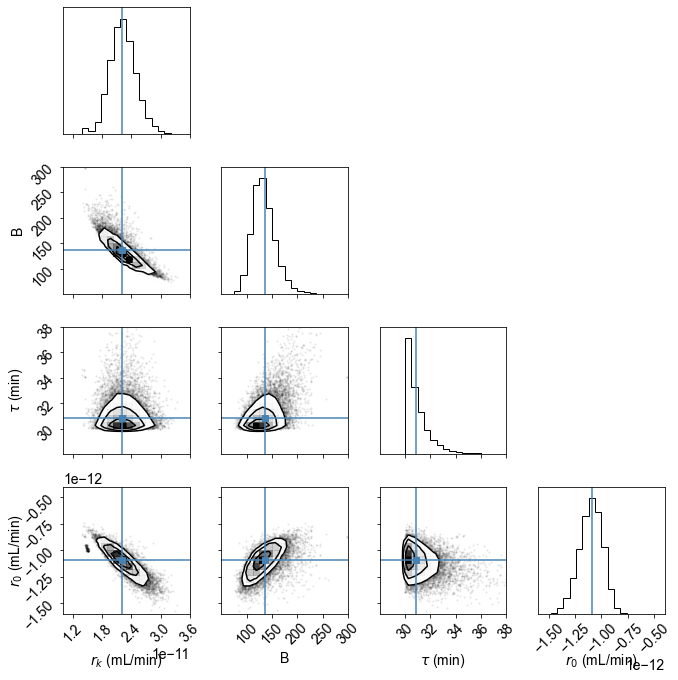

In [109]:
height = 1.9; 
scale_ratio = 2.45; 

fontSize=14
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})


import corner
#matplotlib.rcParams.update({"figure.figsize": (6,6)})
emcee_plot = corner.corner(df_all2.iloc[:,:4],\
                          labels=[r'$r_k$ (mL/min)','B',r'$\tau$ (min)',r'$r_0$ (mL/min)'],\
                           range=[(0.01*1e-9, 0.036*1e-9), (50.,300.),(28.,38.),(-0.0016*1e-9,-0.0004*1e-9)],
                           truths=converging_para
                          )
plt.tight_layout()
#plt.savefig('../LB2d/LB_v1r_para.pdf', format='pdf', bbox_inches='tight')

In [71]:
def check_boundary(para4, perc):
    flag = 1;
    for i in range(4):
        low_ = np.percentile(df_all.iloc[:,i],perc)
        high_ = np.percentile(df_all.iloc[:,i],100-perc)
        if para4[i] < low_ or para4[i] > high_:
            flag = 0; 
    return flag

def get_params(perc, num_of_param):
    count = 0;
    idx_all = np.zeros(num_of_param); 
    while (count <= num_of_param-1):
        idx_tmp = np.random.choice(len(df_all['r'])); 
        paras_tmp = df_all.iloc[idx_tmp,:4];
        flag = check_boundary(paras_tmp, perc)
        if flag == 1:
            idx_all[count] = idx_tmp;
            count = count + 1;
    return idx_all

In [72]:
idx_CI_95 = get_params(2.5, 200)

In [75]:
df_tmp = df_all2.iloc[idx_CI_95,:]
df_tmp.to_csv('../tmp/csv/LB_v1r_cell_CI95.csv')

In [51]:
df_tmp = pd.read_csv('../tmp/csv/LB_v1r_cell_CI95.csv', delimiter=',',index_col=0) 
value_params = [0.02208384, 135.860997, 30.8397653, -0.00109103];

In [56]:
mylow = np.min(mylinear,axis=0)
myhigh = np.max(mylinear,axis=0)

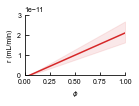

In [62]:
alpha_ = 1; 
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
#height = 1.9; 
#scale_ratio = 2.45; 

fig, ax = plt.subplots(1, 1, figsize=(1.8, 1.8*0.618))

plotx = np.linspace(0,1,100)
mylinear = np.zeros((200,100)); 
#linear_high = np.zeros(100)
k = 0; 
for i in range(len(df_tmp)):
    idxi = int(i)
    myk = df_tmp.iloc[idxi]['r']
    myb = df_tmp.iloc[idxi]['kk']
    mylinear[k,:] = myk*plotx + myb; 
    k = k+1;
#mylinear = mylinear;
mylow = np.min(mylinear,axis=0)
myhigh = np.max(mylinear,axis=0)
plt.plot(plotx, (plotx*0.02208384-0.00109103)*1e-9,color='tab:red')
plt.fill_between(plotx, mylow, myhigh,color='tab:red',alpha=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.xlim((0,1))
plt.ylim((0,3e-11))
plt.xlabel('$\phi$')
plt.ylabel('r (mL/min)')
plt.savefig('../output/Sfig20a-inset.pdf', format='pdf', bbox_inches='tight')

In [117]:
df_tmp = df_all2.iloc[idx_CI_95,:]
df_tmp.to_csv('../tmp/csv/LB_v1r_cell_CI95.csv')

In [63]:
df_tmp = pd.read_csv('../tmp/csv/LB_v1r_cell_CI95.csv', delimiter=',',index_col=0) 

In [65]:
df_tmp2 = pd.read_csv('../../Fig3_Sfig5_and_Sfigs7-8/tmp/csv/LB_v0r_cell_CI95.csv',delimiter=',',index_col=0) 

df_tmp20 = df_tmp2.copy(deep=True)
df_tmp20.iloc[:,0] = df_tmp20.iloc[:,0]*1e-9; 
df_tmp20.iloc[:,3] = df_tmp20.iloc[:,3]*1e-9; 

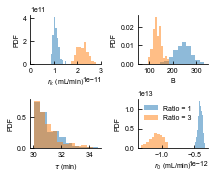

In [66]:
alpha_ = 1; 
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
#height = 1.9; 
#scale_ratio = 2.45; 
titles = [r'$r_k$ (mL/min)','B',r'$\tau$ (min)',r'$r_0$ (mL/min)']; 

matplotlib.rcParams.update({"figure.figsize": (3,2.5)})
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.hist(df_tmp20.iloc[:,i],alpha=0.5,label='Ratio = 1',density=True)
    plt.hist(df_tmp.iloc[:,i],alpha=0.5,label='Ratio = 3',density=True)
    plt.ylabel('PDF')
    if i == 0:
        plt.xlim((0,0.03*1e-9))
    if i == 1:
        plt.xlim((50,350))
    if i == 3:
        plt.legend(frameon=False)
    plt.xlabel(titles[i])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
plt.tight_layout()
plt.savefig('../output/Sfig20c.pdf', format='pdf', bbox_inches='tight')

In [71]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig20c.xlsx")
writer = pd.ExcelWriter("../output/Sfig20c.xlsx", engine = 'xlsxwriter')

df_tmp.to_excel(writer, sheet_name = 'ratio=3')   
df_tmp20.to_excel(writer, sheet_name = 'ratio=1')   

writer.close()

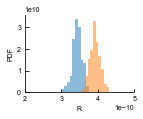

In [72]:
alpha_ = 1; 
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
#height = 1.9; 
#scale_ratio = 2.45; 
titles = [r'$r_k$ (mL/min)','B',r'$\tau$ (min)',r'$r_0$ (mL/min)']; 

g_ = 0.06481156;

matplotlib.rcParams.update({"figure.figsize": (3/1.5,2.5/1.5)})
ax = plt.subplot(1,1,1)
plt.hist(df_tmp20.iloc[:,0]*df_tmp20.iloc[:,1]/np.exp(df_tmp20.iloc[:,2]*g_),\
         alpha=0.5,label='w/ conv',density=True)
plt.hist(df_tmp.iloc[:,0]*df_tmp.iloc[:,1]/np.exp(df_tmp.iloc[:,2]*g_),\
         alpha=0.5,label='wo conv',density=True)
plt.ylabel('PDF')
plt.xlabel('R')
plt.xlim((0.2e-9,0.5e-9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.tight_layout()
plt.savefig('../output/Sfig20d.pdf', format='pdf', bbox_inches='tight')


In [73]:
def simul_(ps):
    data_idx = 0; 
    i = 0; 
    all_cell_arr = {};
    all_phage_arr ={}; 
    
    ts = linspace(0,1400,1400);
    for dataframe_key in time_list_keys: 
        # obtain time list and OD list for cell
        time_cell = time_list[dataframe_key];
        OD_cell = OD_list[dataframe_key]; 

        # obtain time list and OD list for phage
        time_phage = phagetime_list[dataframe_key];
        OD_phage = phageOD_list[dataframe_key];

        # simulate OD
        OD_cell_simul = np.zeros(len(time_cell)); 
        OD_phage_simul = np.zeros(len(time_phage)); 

        #####################################################
        cell_00 = df.loc['E5'].to_numpy()[7] - ymean0[7]; 
        cell_0 = uninfected_OD_to_CFU(cell_00)/1e9; 

        #####################################################

        phage_0 = phageOD_list[dataframe_key][0]; 
        x0 = [1, cell_0, 0, 0, 0, 0, 0, phage_0];
        x = odeint(f0, x0, ts, args=(ps,))

        all_CFU = x[:,1] + (x[:,2]*1 + x[:,3]*1.3 + x[:,4]*1.7 + x[:,5]*2.3 + x[:,6]*3);
        #all_CFU = x[:,1] + x[:,2] + x[:,3] + x[:,4] + x[:,5] + x[:,6]; 
        my_adsorptivity = poly5(x[:,0], *popt1);

        all_cell_tmp = np.multiply(all_CFU, my_adsorptivity)/4.5; 
        all_phage_tmp = x[:,7] + ps[1]*x[:,6]; #0.5*ps[1]*(x[:,2] + x[:,3] + x[:,4] + x[:,5]+ x[:,6]); 
        
        max_time_cell = round(max(time_cell))
        max_time_phage = round(max(time_phage))
        
        all_cell_arr[dataframe_key] = all_cell_tmp[:max_time_cell]
        all_phage_arr[dataframe_key] = all_phage_tmp[:max_time_phage]
        
    return (all_cell_arr, all_phage_arr)

In [74]:
def get_lower_and_upper_bound(idx_all):
    range_cell = {};
    range_phage = {};

    l_cell = {};
    h_cell = {};
    l_phage = {};
    h_phage = {};
    
    for dataframe_key in time_list_keys: 
        time_cell = time_list[dataframe_key];
        time_phage = phagetime_list[dataframe_key];
        
        max_time_cell = round(max(time_cell))
        max_time_phage = round(max(time_phage))
        
        range_cell[dataframe_key] = np.empty([len(idx_all),max_time_cell])
        range_phage[dataframe_key] = np.empty([len(idx_all),max_time_phage])
    
    for j in range(len(idx_all)):
        #para_tmp = res.flatchain.iloc[int(idx_all[j]),:4];
        para_tmp = df_tmp.iloc[int(idx_all[j]),:4];
        all_cell_arr, all_phage_arr = simul_(para_tmp);
        for dataframe_key in time_list_keys: 
            range_cell[dataframe_key][j] = all_cell_arr[dataframe_key];
            range_phage[dataframe_key][j] = all_phage_arr[dataframe_key];
    
    for dataframe_key in time_list_keys: 
        l_cell[dataframe_key] = np.min(range_cell[dataframe_key], axis=0);
        h_cell[dataframe_key] = np.max(range_cell[dataframe_key], axis=0);
        l_phage[dataframe_key] = np.min(range_phage[dataframe_key], axis=0);
        h_phage[dataframe_key] = np.max(range_phage[dataframe_key], axis=0);
    return(l_cell, h_cell, l_phage, h_phage)

In [80]:
df_tmp0 = pd.read_csv('../tmp/csv/LB_v1r_cell_CI95.csv', delimiter=',',index_col=0) 
df_tmp0 = df_tmp0.iloc[:,:4]
df_tmp = df_tmp0.copy(deep=True)
df_tmp.iloc[:,0] = df_tmp.iloc[:,0]*1e9
df_tmp.iloc[:,3] = df_tmp.iloc[:,3]*1e9

In [81]:
#(l_cell, h_cell, l_phage, h_phage) = get_lower_and_upper_bound(idx_CI_90);
(l_cell, h_cell, l_phage, h_phage) = get_lower_and_upper_bound(range(len(df_tmp)))

In [82]:
#p_best = list(res.params.valuesdict().values())[:4]; 
p_best = [0.02208384, 135.860997, 30.8397653, -0.00109103]; 
#p_best = median_params; 
(cell_best, phage_best) = simul_(p_best);

<ipython-input-84-5677c76cdd57>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = subplot(1,2,1)
<ipython-input-84-5677c76cdd57>:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = subplot(1,2,2)
<ipython-input-84-5677c76cdd57>:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

[ 0. 12. 14. 17. 18. 20. 22. 24. 27. 29. 32. 36. 39. 40. 44. 48. 50. 52.
 56. 58. 60. 64. 66. 68. 70. 79.]


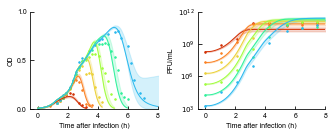

In [84]:
ts = np.linspace(0,1400,1400); 
###########################

from matplotlib.pyplot import cm
colors=cm.turbo.reversed()(np.linspace(0,1,9))

marker_size_ = 1.5; 
line_width_ = 1; 
color_off_set = 1; 

alpha_ = 1; 
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
height = 1.9; 
scale_ratio = 2.45; 

matplotlib.rcParams.update({"figure.figsize": (height*scale_ratio,height)})
###########################

i = 0; 
for dataframe_key in time_list_keys: 
    # obtain time list and OD list for cell
    time_cell = time_list[dataframe_key];
    max_time_cell = round(max(time_cell))
    OD_cell = OD_list[dataframe_key]; 

    # obtain time list and OD list for phage
    time_phage = phagetime_list[dataframe_key];
    max_time_phage = round(max(time_phage))
    OD_phage = phageOD_list[dataframe_key];
    
    if dataframe_key == '3_0':
        time00 = (df.loc["Time [s]"].to_numpy()[7:] - df.loc["Time [s]"].to_numpy()[7])/60;
        idx__ = np.zeros(len(time_list['3_0']));
        jj = 0; 
        for ii in time_list['3_0']:
            idx__[jj] = np.where(time00 >= ii)[0][0];
            jj = jj+1;
        print(idx__)
        idx__ = idx__.astype(int)
        idx__ = idx__.astype(int)
        cc = df.loc['C7'].to_numpy()[7:] - ymean[7:];  #C7,C8,D7,D8
        OD_cell = cc[idx__];
    
    ax = subplot(1,2,1)
    if i == 5:
        plt.plot(ts[:max_time_cell]/60, cell_best[dataframe_key][:max_time_cell], \
                 color=colors[i+color_off_set,:], \
                 linewidth=line_width_,alpha=alpha_,label='Model',zorder=10)
        plt.plot(time_cell[:-3]/60, OD_cell[:-3], 'o', \
                 markersize=marker_size_, \
                 color=colors[i+color_off_set,:],label='Data',zorder=0)
    else:
        plt.plot(ts[:max_time_cell]/60, cell_best[dataframe_key][:max_time_cell],\
                 color=colors[i+color_off_set,:], alpha=alpha_,\
                 linewidth=line_width_,zorder=10)
        plt.plot(time_cell/60, OD_cell, 'o', \
                 markersize=marker_size_, \
                 color=colors[i+color_off_set,:],zorder=0)
    ax.fill_between(ts[:max_time_cell]/60, l_cell[dataframe_key], h_cell[dataframe_key], \
                    color=colors[i+color_off_set,:], alpha=0.2)
    plt.xlabel('Time after infection (h)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    plt.xlim((-0.5,8))
    plt.ylim((0,1))
    plt.ylabel('OD')
    plt.yticks([0,0.5,1],['0.0','0.5','1.0'])
    
    ax = subplot(1,2,2)
#    plt.title('Phage')
    plt.plot(time_phage/60, OD_phage*1e9, 'o', \
             markersize=marker_size_, \
             color=colors[i+color_off_set,:])
    plt.plot(ts[:len(phage_best[dataframe_key])]/60, phage_best[dataframe_key]*1e9,\
             color=colors[i+color_off_set,:],\
             linewidth=line_width_,alpha=alpha_)
    ax.fill_between(ts[:max_time_phage]/60, l_phage[dataframe_key]*1e9, h_phage[dataframe_key]*1e9,\
                    color=colors[i+color_off_set,:], alpha=0.2)
    plt.yscale('log')
    plt.ylabel('PFU/mL')
    plt.xlabel('Time after infection (h)')
    plt.ylim((1e3,1e12))
    plt.xlim((-0.5,8))
    plt.yticks([1e3,1e6,1e9,1e12],[r'$10^3$',r'$10^6$',r'$10^9$',r'$10^{12}$'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    i = i+1;
plt.tight_layout()
plt.savefig('../output/Sfig20ab.pdf', format='pdf', bbox_inches='tight')

In [85]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig20ab.xlsx")
writer = pd.ExcelWriter("../output/Sfig20ab.xlsx", engine = 'xlsxwriter')

for dataframe_key in time_list_keys: 
    # obtain time list and OD list for cell
    time_cell = time_list[dataframe_key];
    max_time_cell = round(max(time_cell))
    OD_cell = OD_list[dataframe_key]; 

    # obtain time list and OD list for phage
    time_phage = phagetime_list[dataframe_key];
    max_time_phage = round(max(time_phage))
    OD_phage = phageOD_list[dataframe_key];

    dftmptmp = pd.DataFrame({'Time after infection (h)':time_cell/60,\
                        'OD':OD_cell})
    dftmptmp = dftmptmp.T
    dftmptmp.to_excel(writer, sheet_name = 'cell-data'+dataframe_key)   

    #########################
    dftmptmp = pd.DataFrame({'Time after infection (h)':ts[:max_time_cell]/60,\
                        'OD (best fit)':cell_best[dataframe_key][:max_time_cell],\
                        'OD (upper bound)':h_cell[dataframe_key],\
                        'OD (lower bound)':l_cell[dataframe_key]})
    dftmptmp = dftmptmp.T
    dftmptmp.to_excel(writer, sheet_name = 'cell-fit'+dataframe_key)    

    #########################
    
    dftmptmp = pd.DataFrame({'Time after infection (h)':time_phage/60,\
                        'PFU per mL':OD_phage*1e9})
    dftmptmp = dftmptmp.T
    dftmptmp.to_excel(writer, sheet_name = 'phage-data'+dataframe_key)   
    #########################

    dftmptmp = pd.DataFrame({'Time after infection (h)':ts[:len(phage_best[dataframe_key])]/60,\
                        'PFU per mL (best fit)':phage_best[dataframe_key]*1e9,\
                        'PFU per mL (upper bound)':h_phage[dataframe_key]*1e9,\
                        'PFU per mL (lower bound)':l_phage[dataframe_key]*1e9})
    dftmptmp = dftmptmp.T
    dftmptmp.to_excel(writer, sheet_name = 'phage-fit'+dataframe_key)   


writer.close()